In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.libqsturng import psturng, qsturng


def std_sample_mean(s_population, n):
    """For a sample of size n, calculate the standard deviation of the sample mean,
    given the standard deviation of the population.
    """
    return s_population / np.sqrt(n)


def ci(mean, std, confidence):
    '''Calculate the confidence interval for the specified normal distribution of N(mean, std)
    at given two-sided confidence level.
    '''
    two_sided_confidence = confidence + (1 - confidence) / 2
    std_error = st.norm.ppf(two_sided_confidence)
    return mean - std_error * std, mean + std_error * std


def ci_t(mean, std, df, confidence):
    '''Calculate the confidence interval for the specified t distribution of N(mean, std)
    at given two-sided confidence level.
    '''
    two_sided_confidence = confidence + (1 - confidence) / 2
    std_error = st.t.ppf(two_sided_confidence, df)
    return mean - std_error * std, mean + std_error * std


def r2(t, df):
    """Return the coefficient of determination given the t-statistic of a t-test and the
    degrees of freedom df.
    """
    return t**2 / (t**2 + df)


def t_statistic(r, N):
    """Calculate the t statistic for the specified Pearson's correlation coefficient r and sample size N."""
    degrees_of_freedom = N - 2
    t = r * np.sqrt(degrees_of_freedom / (1 - r**2))
    return t


def p_value(r, N):
    """Calculate the p value for the specified Pearson's correlation coefficient r, sample size N and
    two-tailed confidence = 0.95."""
    degrees_of_freedom = N - 2
    t = abs(t_statistic(r, N))
    return (1 - st.t.cdf(t, degrees_of_freedom)) * 2


In [2]:
filename = "../data/correlations.csv"
corr = pd.read_csv(filename)

In [3]:
corr.dtypes

dentist      int64
temp       float64
age          int64
year         int64
pets         int64
eggs         int64
icons       object
emails       int64
party        int64
dtype: object

In [4]:
corr.head()

,dentist,temp,age,year,pets,eggs,icons,emails,party
0,1,30.0,26,1987,0,0,8,0,30
1,10,10.0,69,1944,0,0,8,0,0
2,10,20.0,39,1974,1,0,34,500,60
3,5,NaN,26,1987,0,12,22,1267,0
4,3,15.0,31,1982,0,3,28,1,30


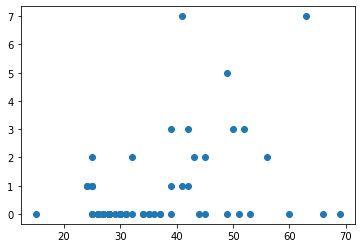

In [5]:
plt.scatter(corr['age'], corr['pets'])

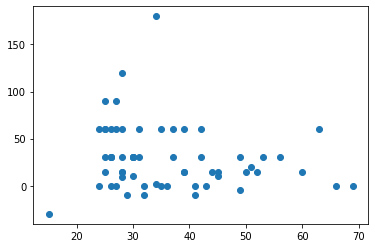

In [6]:
plt.scatter(corr['age'], corr['party'])

In [7]:
r1, p1 = st.pearsonr(corr['age'], corr['pets'])

print("Pearson's correlation coefficient r = {:.3f}, p-value = {:.4f}".format(r1, p1))

Pearson's correlation coefficient r = 0.376, p-value = 0.0028


In [8]:
r2, p2 = st.pearsonr(corr['age'], corr['party'])

print("Pearson's correlation coefficient r = {:.3f}, p-value = {:.4f}".format(r2, p2))

Pearson's correlation coefficient r = -0.164, p-value = 0.2060


In [9]:
n = len(corr)

t1 = t_statistic(r1, n)

print("t-statistic = {:.4f}".format(t1))

t-statistic = 3.1146


In [10]:
t2 = t_statistic(r2, n)

print("t-statistic = {:.4f}".format(t2))

t-statistic = -1.2787


In [12]:
p1 = p_value(r1, n)

print("p-value = {:.4f}".format(p1))

p-value = 0.0028


In [14]:
p2 = p_value(r2, n)

print("p-value = {:.4f}".format(p2))

p-value = 0.2060


# Problem Set 14

In [16]:
filename = "../data/gestation.csv"
gestation = pd.read_csv(filename)

In [17]:
gestation.dtypes

Animal               object
Gestation (days)      int64
Longevity (years)     int64
dtype: object

In [18]:
gestation.head()

,Animal,Gestation (days),Longevity (years)
0,Baboon,187,20
1,"Bear, Black",219,18
2,"Bear, Grizzly",225,25
3,"Bear, Polar",240,20
4,Beaver,105,5


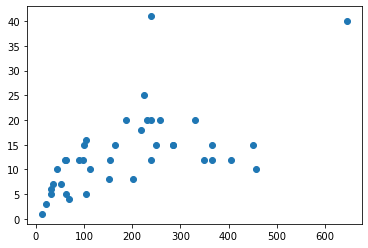

In [19]:
plt.scatter(gestation['Gestation (days)'], gestation['Longevity (years)'])

In [20]:
r, p = st.pearsonr(gestation['Gestation (days)'], gestation['Longevity (years)'])

print("Pearson's correlation coefficient r = {:.3f}, p-value = {:.5f}".format(r, p))

Pearson's correlation coefficient r = 0.589, p-value = 0.00006


In [21]:
r**2

0.3472894512300694

In [23]:
p_value(.385, 30)

0.03565135255041452